In [1]:
%matplotlib widget
import fibretracker as ft
import numpy as np
import matplotlib.pyplot as plt


data_path = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/UD-01_FoV_2_B2_recon.txm'
data_path1 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/Mock-01_FoV_2_B2_recon.txm'
data_path2 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/GFRP'
data_path3 = '/Users/pooja/Documents/PhD_work/ICPR_docs/data/Mock_UD_GFRP_data/XCT_LR'

# V_GFRP = ft.io.load(data_path2, contains='.tif')
# V_SCT = ft.io.load(data_path3, contains='.tif')

# V_txm1 = ft.io.load(data_path)
V_txm2 = ft.io.load(data_path1)

astropy module not found


In [3]:
V_norm = ft.io.normalize(V_txm2).astype(float)
V_tmp = V_norm[100:350, 100:350, 100:350]

In [4]:
V_tmp = V_norm[100:350]

interactive(children=(HBox(children=(IntSlider(value=499, description='Z', max=998), IntSlider(value=506, desc…

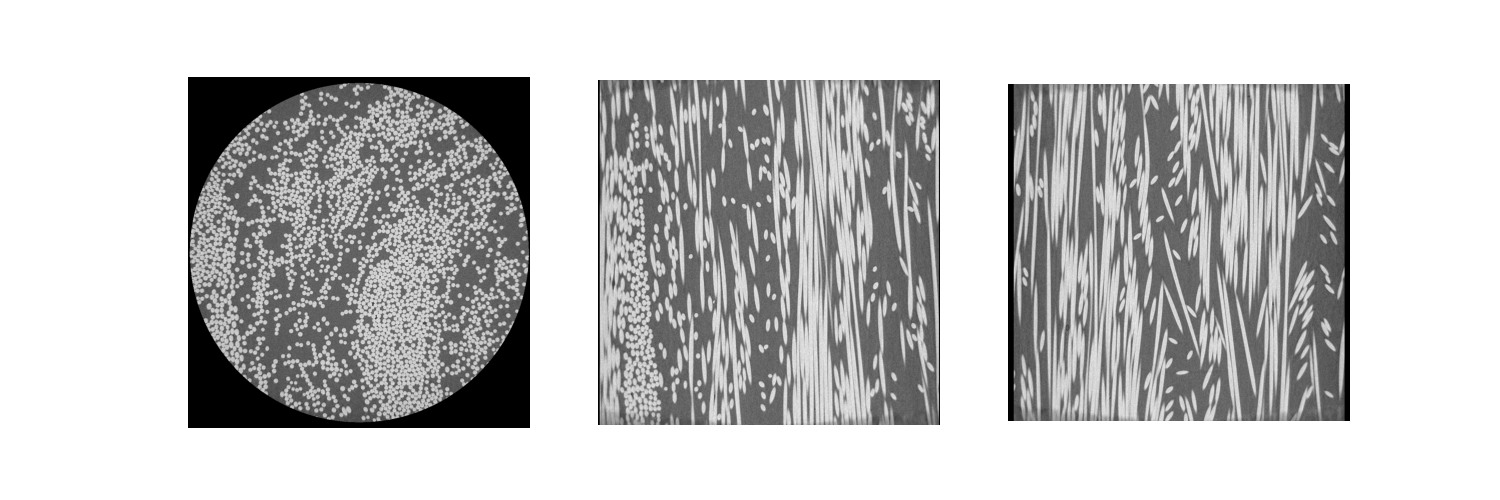

In [2]:
ft.viz.orthogonal(V_txm2)

In [6]:
import qim3d

val, vec = qim3d.processing.structure_tensor(V_tmp, visualize=True, axis=2)

/Users/pooja/miniconda3/envs/fibretracker/lib/python3.11/site-packages/structure_tensor/st3d.py:262: RuntimeWarning: invalid value encountered in divide
  vec /= l


interactive(children=(IntSlider(value=499, description='Slice', max=998, style=SliderStyle(description_width='…

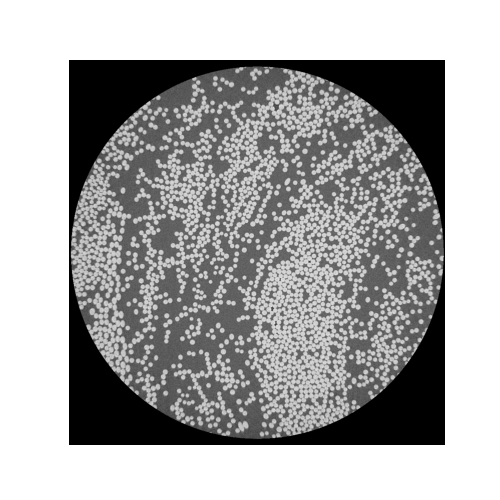

In [3]:
ft.viz.slicer(V_txm2)

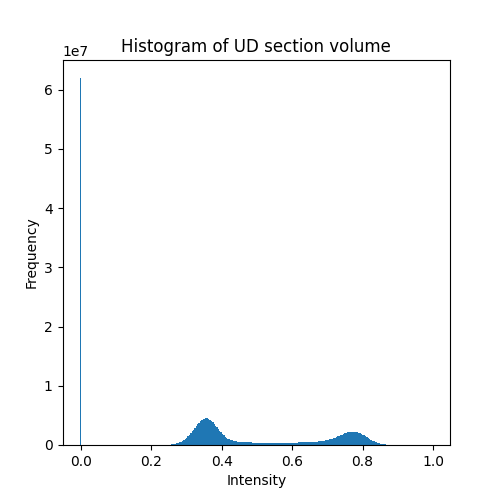

In [5]:
V = V_tmp
n_bins = int(255*(V.max() - V.min()) + 1)
hist, bins = np.histogram(V, bins=n_bins)
bin_width = bins[1] - bins[0]
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.bar(bins[:-1], hist, width=bin_width)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of UD section volume')
plt.show()                           

In [6]:
detect_coords = ft.models.get_fibre_coords(V_tmp, threshold_abs=0.6)

In [10]:
len(detect_coords)

250

In [11]:
r = [coord[:,0] for coord in detect_coords]

In [18]:
r[0].shape

(2568,)

interactive(children=(IntSlider(value=125, description='Slice', max=249, style=SliderStyle(description_width='…

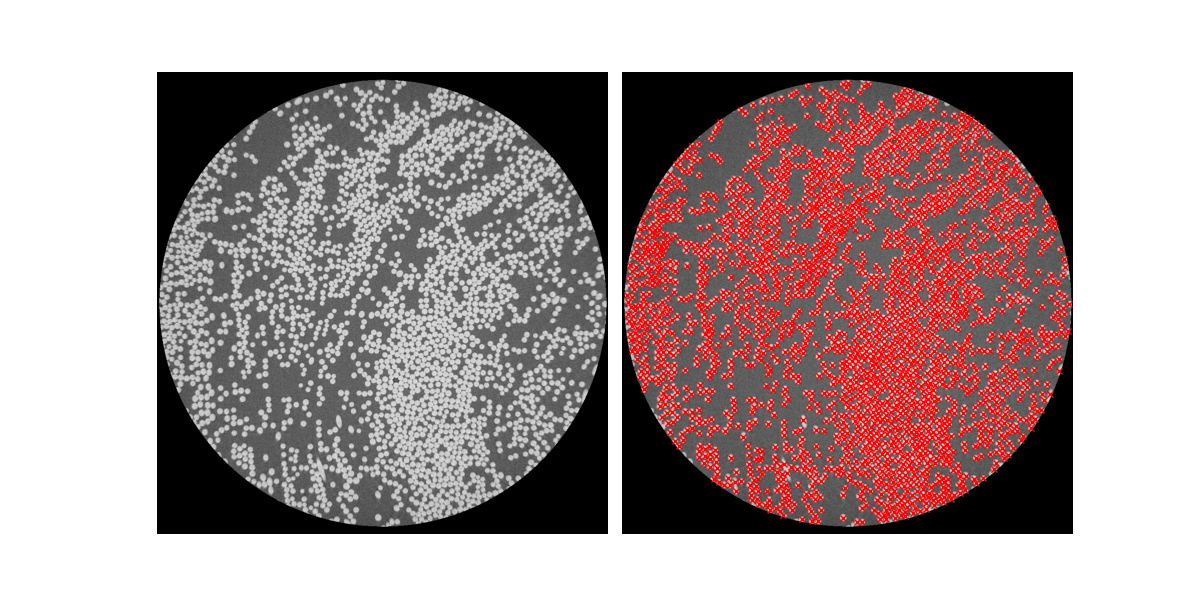

In [16]:
ft.viz.slicer(V_tmp, detect_coords=detect_coords, mark_size=4, img_height=6, img_width=6)

In [17]:
tracks = ft.models.track_fibres(coords=detect_coords)
tracks_gauss = ft.models.track_fibres(V_tmp, coords=detect_coords, smoothtrack_gaussian=True, sigma=2)

Smoothing tracks using Gaussian       


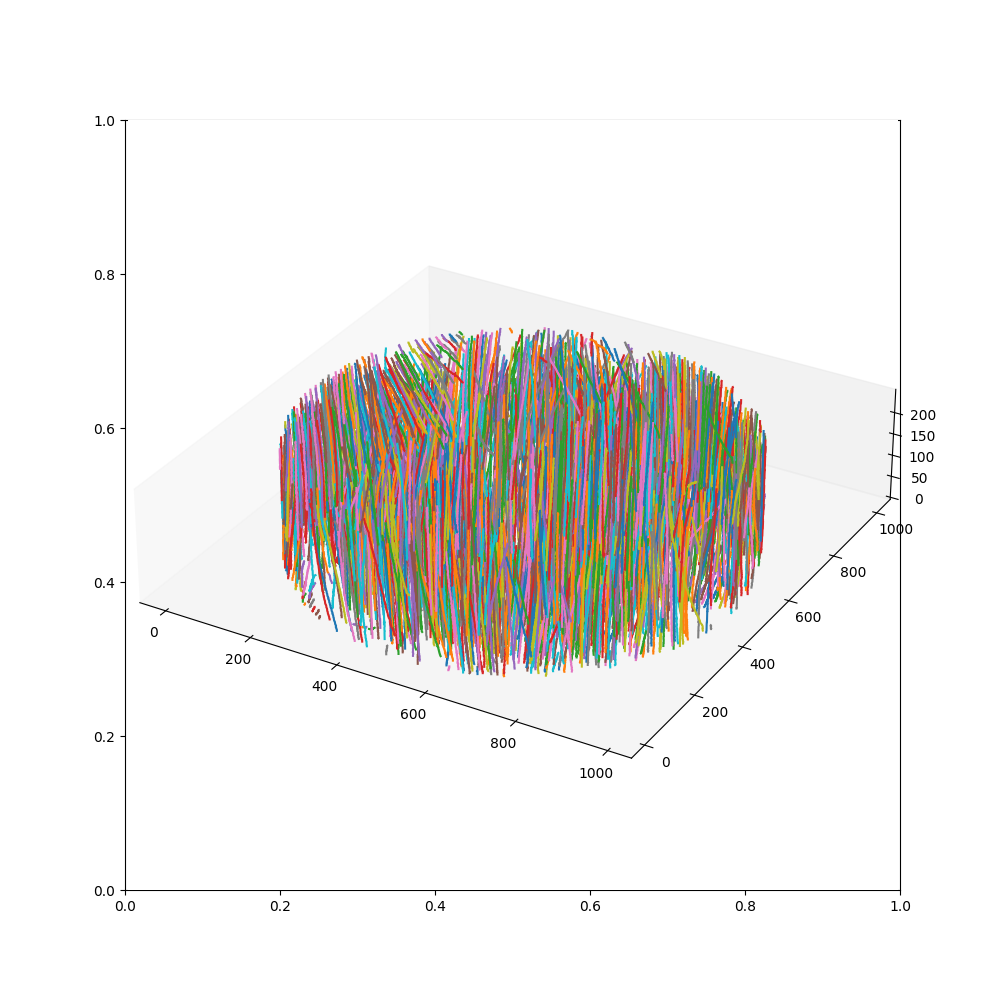

(<Figure size 1000x1000 with 2 Axes>, <Axes3D: >)

In [19]:
ft.viz.plot_tracks(tracks)

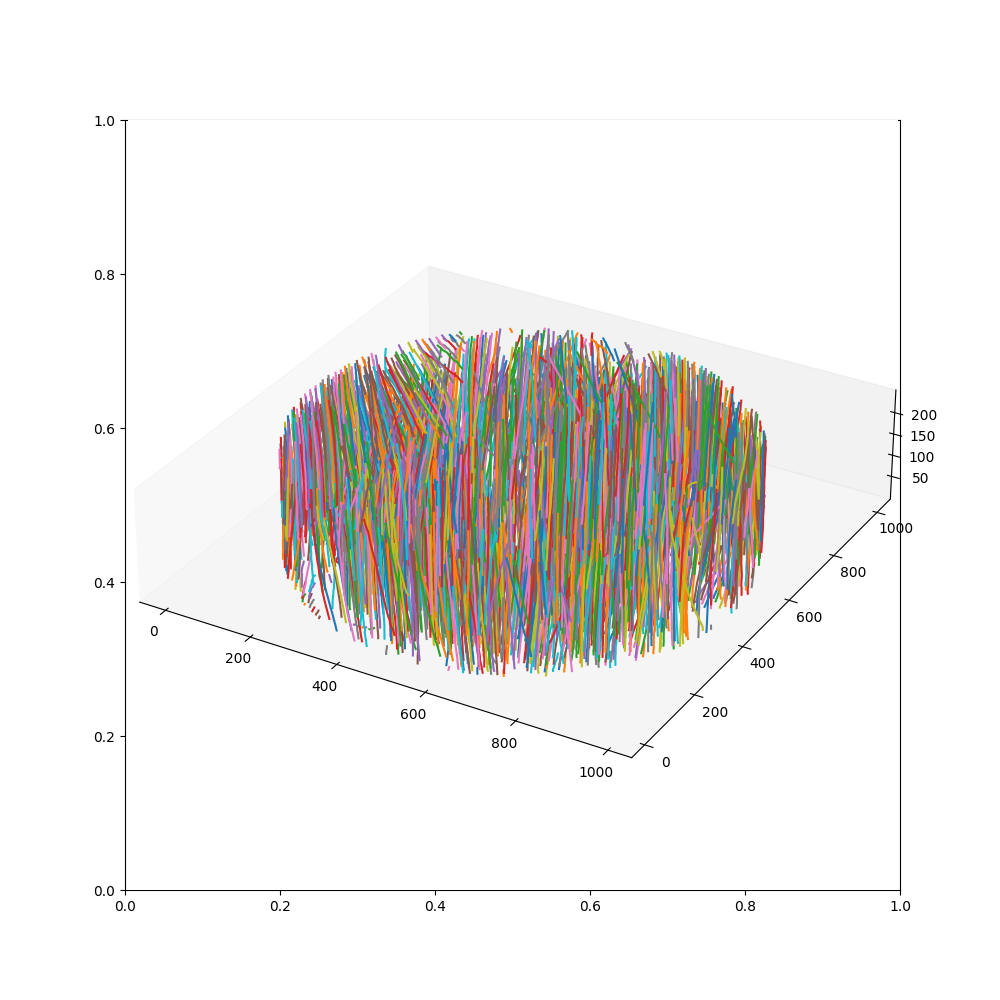

(<Figure size 1000x1000 with 2 Axes>, <Axes3D: >)

In [18]:
ft.viz.plot_tracks(tracks_gauss)

In [10]:
tracks_ws = ft.models.track_fibres(V_tmp, coords=detect_coords, smoothtrack_watershed=True, threshold=0.6)

Smoothing tracks using watershed...   
Watershed volume created.


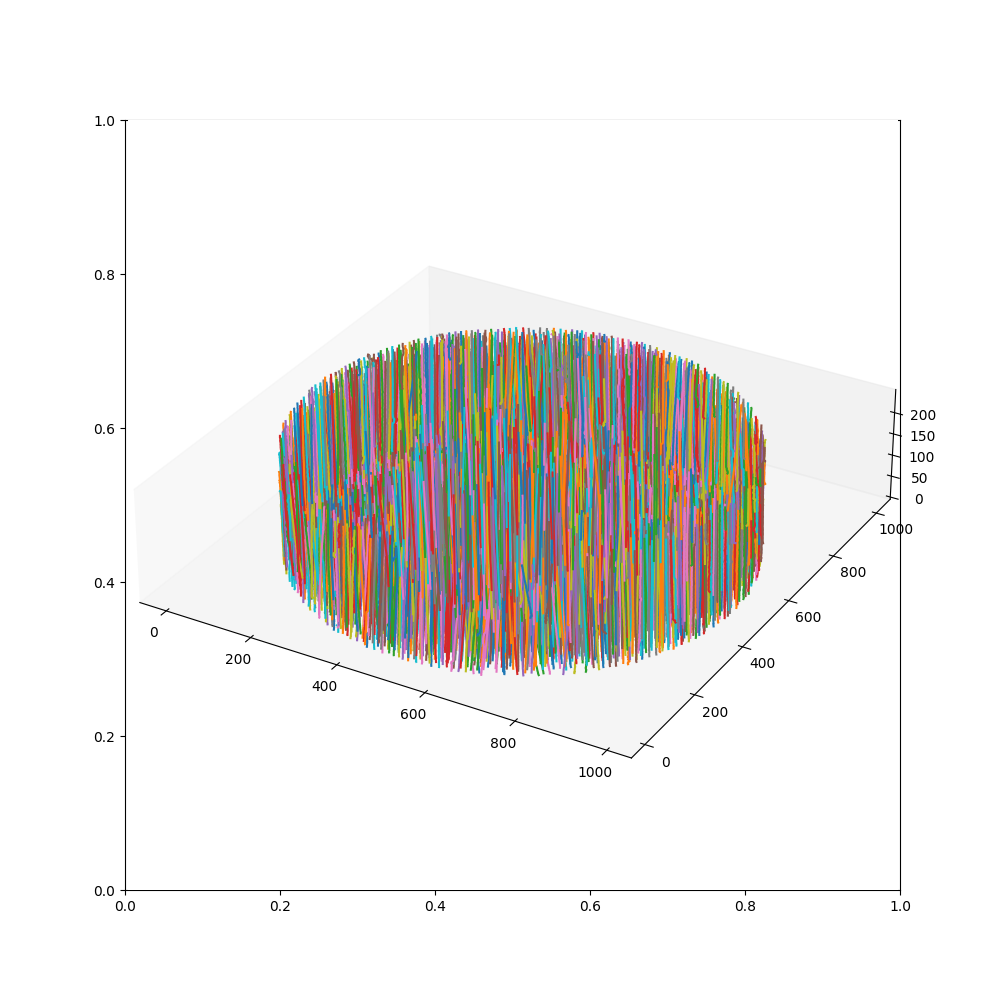

(<Figure size 1000x1000 with 2 Axes>, <Axes3D: >)

In [11]:
ft.viz.plot_tracks(tracks_ws)

37654


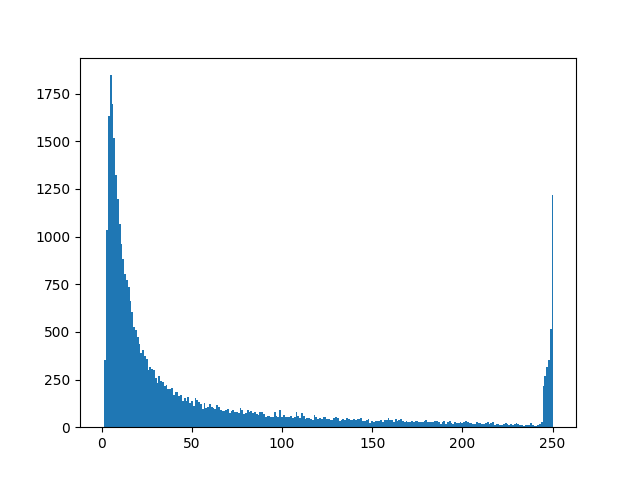

In [6]:
data = tracks
print(len(data))  
track_lengths =[len(data[i]) for i in range(len(data))]
max_length = max(track_lengths)
fig, ax = plt.subplots()
lh = np.histogram(track_lengths, bins = np.arange(0, max_length + 1) + 0.5)[0]
ax.bar(np.arange(0, max_length) + 1, lh, 1)
# ax.set_yscale('log')
plt.show()


In [ ]:
im = V_norm[150]
coord = ft.models.blob_centre_detector(im, threshold_abs=0.55)
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.imshow(im, cmap='gray')
ax.plot(coord[:, 1], coord[:, 0], 'rx', markersize=4, alpha=0.9, markeredgewidth=2)

cropx = 500
cropx1 = 628

cropy = 500
cropy1 = 628
zoomed_img = im[cropx:cropx1, cropy:cropy1]
zoomed_coord = coord[(coord[:, 0] >= cropx) & (coord[:, 0] <= cropx1) & (coord[:, 1] >= cropy) & (coord[:, 1] <= cropy1)]

zoomed_coord = zoomed_coord - [cropx, cropy]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
size = 4
axes[0].axis('off')
axes[0].imshow(zoomed_img, cmap='gray')
axes[0].set_xlim(0, zoomed_img.shape[1])
axes[0].set_ylim(0, zoomed_img.shape[0])
axes[0].plot(zoomed_coord[:,1], zoomed_coord[:,0], 'rx', markersize=size, alpha=0.9, markeredgewidth=2)

axes[1].axis('off')
axes[1].imshow(zoomed_img, cmap='gray')
axes[1].set_xlim(0, zoomed_img.shape[1])
axes[1].set_ylim(0, zoomed_img.shape[0])
plt.show()

from matplotlib.patches import Rectangle
im = V_norm[150]
coord = ft.models.blob_centre_detector(im, threshold_abs=0.55)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(im, cmap='gray')
ax.plot(coord[:, 1], coord[:, 0], 'rx', markersize=4, alpha=0.6, markeredgewidth=1)

rect = Rectangle((500, 500), 128, 128, edgecolor='b', facecolor='none', linewidth=2)
ax.add_patch(rect)
plt.axis('off')

plt.show()


In [ ]:
from matplotlib.patches import Rectangle
mid_slice = V_txm1[V_txm1.shape[0] // 2]
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mid_slice, cmap='gray')
rect = Rectangle((500, 500), 128, 128, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)
plt.axis('off')
plt.show()

In [ ]:
N = 50
sample = np.random.choice(range(len(data)), N)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for s in sample:
    ax.plot(data[s][:,0], data[s][:,1], data[s][:,2], label=f'Track {s}, length {len(data[s])}')    
fig.legend(fontsize=6)

In [ ]:
def regularization_matrix(N, alpha, beta, open_curve=False):
    '''Returns circulant N x N matrix for imposing elasticity and rigidity to snakes.
     
    Parameters
    ----------
    N : int
        Number of points in the curve.

    alpha : float
        Weight for elasticity.

    beta : float
        Weight for rigidity.

    Returns
    -------
    ndarray
        Circulant N x N smoothing matrix.
    
    '''
    s = np.zeros(N)
    if not open_curve:
        s[[-2, -1, 0, 1, 2]] = (alpha * np.array([0, 1, -2, 1, 0]) + 
                    beta * np.array([-1, 4, -6, 4, -1]))
        S = scipy.linalg.circulant(s)
    else:
        s[[0, 1, 2]] = (alpha * np.array([-2, 1, 0]) + 
                    beta * np.array([-6, 4, -1]))
        S = scipy.linalg.toeplitz(s)
        S[[0, -1], [0, -1]] = - alpha - 3 * beta
        S[[1, -2], [1, -2]] = - 2 * alpha - 7 * beta
    
    return scipy.linalg.inv(np.eye(N) - S)

In [ ]:
data_smoothed = tracks_gauss
data_smoothed1 = tracks_ws
data = tracks


s = 2028
fig, ax = plt.subplots(1, 2, figsize=(30,12))

ax[0].plot(data[s][:, 0], data[s][:, 2], 'r', alpha=0.5, label='Original')
ax[0].plot(data_smoothed[s][:, 0], data_smoothed[s][:, 2], 'g', alpha=0.8, label='Gaussian Smoothening')
ax[0].plot(data_smoothed1[s][:, 0], data_smoothed1[s][:, 2], 'b', alpha=0.6, label='Watershed Smoothening')

ax[0].set_xlabel('X', fontsize=20, fontweight='bold')
ax[0].set_ylabel('Z', fontsize=20, fontweight='bold')
ax[0].legend(prop={'weight':'bold', 'size': 16})
ax[0].tick_params(axis='both', which='major', labelsize=20)


ax[1].plot(data[s][:, 1], data[s][:, 2], 'r', alpha=0.5, label='Original')
ax[1].plot(data_smoothed[s][:, 1], data_smoothed[s][:, 2], 'g', alpha=0.8, label='Gaussian Smoothening')
ax[1].plot(data_smoothed1[s][:, 1], data_smoothed1[s][:, 2], 'b', alpha=0.6, label='Watershed Smoothening')
ax[1].set_xlabel('Y', fontsize=20, fontweight='bold')
ax[1].set_ylabel('Z', fontsize=20, fontweight='bold')
ax[1].legend(prop={'weight':'bold', 'size': 16})
ax[1].tick_params(axis='both', which='major', labelsize=20)

plt.show()

In [ ]:
data_smoothed = tracks_gauss
data_smoothed1 = tracks_ws
data = tracks

alpha = 20
beta = 50

# for i in range(len(data)):
#     N = len(data[i])
#     B = regularization_matrix(N, alpha, beta, open_curve=True)
#     data_smoothed[i] = B @ data[i]


#%%
s = 2002
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(data[s][:, 0], data[s][:, 2], 'r', alpha=0.5, label='Original')
ax[0].plot(data_smoothed[s][:, 0], data_smoothed[s][:, 2], 'g', alpha=0.8, label='Gaussian Smoothening')
ax[0].plot(data_smoothed1[s][:, 0], data_smoothed1[s][:, 2], 'b', alpha=0.6, label='Watershed Smoothening')

ax[0].set_xlabel('X', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Z', fontsize=12, fontweight='bold')
ax[0].legend()

ax[1].plot(data[s][:, 1], data[s][:, 2], 'r', alpha=0.5, label='Original')
ax[1].plot(data_smoothed[s][:, 1], data_smoothed[s][:, 2], 'g', alpha=0.8, label='Gaussian Smoothening')
ax[1].plot(data_smoothed1[s][:, 1], data_smoothed1[s][:, 2], 'b', alpha=0.6, label='Watershed Smoothening')
ax[1].set_xlabel('Y', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Z', fontsize=12, fontweight='bold')
ax[1].legend()

plt.show()

# %%
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')

# for s in sample:
#     ax.plot(data[s][:,0], data[s][:,1], data[s][:,2], 'r')    
#     ax.plot(data_smoothed[s][:,0], data_smoothed[s][:,1], data_smoothed[s][:,2], 'g')    
# fig.legend(fontsize=6)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(data[s][:, 0], data[s][:, 1], data[s][:, 2], 'r', alpha=0.5, label='Original')
ax.plot(data_smoothed[s][:, 0], data_smoothed[s][:, 1], data_smoothed[s][:, 2], 'g', alpha=0.8, label='Gaussian Smoothened')
ax.legend()
ax.grid(False)
ax.set_aspect('equal')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [ ]:
data[s]